# **자연어 3일 - NLTK, Token, Word Piece Modeling**

# **Preview**
Focused Crawling
- 웹 페이지를 **Bs4** 객체로 저장하기
- 웹 페이지중 **포커싱된 DOM** 요소를 *.txt 파일로 저장하기

In [1]:
# 앞에서 작업한 수집모듈 
import requests, time
def download(method, url, params=None, data=None):
    userAgent = {"user-agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0"}
    resp = requests.request(method, url, params=params, data=data, headers= userAgent)
    return resp

In [2]:
# 뉴스 Page Bs4 객체로 저장하기
from bs4 import BeautifulSoup
url = "https://news.naver.com"
dom = BeautifulSoup(download("get", url).text, "lxml")

# Bs4 객체 내 제목의 수집
for _ in dom.select("ul.hdline_article_list  a.lnk_hdline_article"):
    if len(_["href"]) >1: # if _.has_attr("href"):
        print(_.text.strip())

나경원 "김정은·호날두 공통점, 韓 호구로 여겨…김정은은 김날두"
산케이 “日, 韓 징용판결 해결책 내놓지 않으면 정상회담 안 할 것”
이해찬 "황교안, 국민뽑은 대통령을 적이라 생각…있을 수 없어"
文대통령, 지난 주말 2박3일 제주 다녀와…국내외 현안 해법구상
트럼프, 인종차별 논란 불구 연일 흑인중진 공격


In [3]:
%%time
# 개별 뉴스들의 Link 주소 수집하기
css_select = "ul.hdline_article_list  a.lnk_hdline_article,  ul.mlist2.no_bg li > a"
newsList = [requests.compat.urljoin(url, _["href"])  
            for _ in dom.select(css_select)
            if len(_["href"]) >1]
print(len(newsList), newsList[0])

# aid 주소로 파일생성 및 Link 결과 저장하기
# for _ in newsList:
#     fileName = _.split("&")[-1][4:]+ ".txt"
#     dom      = BeautifulSoup(download("get", _).text, "lxml")
#     content  = dom.select_one("#articleBodyContents").text.strip()
#     with open("./News/" + fileName, "w", encoding="utf-8") as f:
#         f.write(content)
        
print("News Crawling is Saved.. ")

35 https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=003&aid=0009372955
News Crawling is Saved.. 
CPU times: user 33 ms, sys: 52 µs, total: 33 ms
Wall time: 32.3 ms


# **Konlpy 를 활용한 Tokenizing**
## **1 Mecab 을 활용한 Token**
- Twitter, Hananum 등은 단어 기준으로 Tag 를 생성
- 문장 내 성분분석은 하지 않아서 단어간 품사 구분은 못함
- 유일하게 **Mecab** 에서는 **문장 구조내 품사분석** 결과를 출력한다

In [4]:
# 구분이 안되는데???? Mecab 만 된다 ㅠㅠ
from konlpy.tag import Mecab
ko_tag = Mecab()
ko_tag.pos("나는 자연인이다")

[('나', 'NP'), ('는', 'JX'), ('자연인', 'NNG'), ('이', 'VCP'), ('다', 'EC')]

In [5]:
ko_tag.pos("싹이 나는 과정이다")

[('싹', 'NNG'),
 ('이', 'JKS'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('과정', 'NNG'),
 ('이', 'VCP'),
 ('다', 'EC')]

In [6]:
ko_tag.pos("비행기가 나는 중에 있다")

[('비행기', 'NNG'),
 ('가', 'JKS'),
 ('나', 'VV'),
 ('는', 'ETM'),
 ('중', 'NNB'),
 ('에', 'JKB'),
 ('있', 'VV'),
 ('다', 'EC')]

# **NLTK 를 활용한 Token의 생성**
nltk 등의 모듈결과 부족한 부분은 **Regex** 로 보완 합니다
    
## **1 Sentence Tokenizer**
nltk 의 sent_tokenize

```python
 .split() : 공백을 기준으로 Token 구분
 .splitlines() : Enter 개행문자 ('\n') 기준으로 Token 구분
```

In [7]:
# nltk 를 활용한 Token 의 생성 
from nltk.tokenize import sent_tokenize, word_tokenize
sent_tokenize("the technology is advanced. My computer is So Good")

['the technology is advanced.', 'My computer is So Good']

In [8]:
# 영어가 기준인 만큼 한글은 결과값 해석시 주의할 필요가 있다
sent_tokenize("오늘은 습하네요! .?. 덥기도 하구요")

['오늘은 습하네요!', '.?.', '덥기도 하구요']

In [9]:
# 정규식에서 숫자는 : String Range 값을 특정 합니다
import os, re
# re.match("\d{10}.txt", '0002542252.txt',)

fileList = [_  for _ in os.listdir("./News/") 
               if re.match("\d{10}.txt", _) ] #  if _.endswith("txt")

with open("./News/" + fileList[0]) as f:
    corpus = f.read()

len(corpus), len(corpus.split()), len(corpus.splitlines())

(1187, 248, 5)

In [10]:
# 처리가 부족한 부분은 re 를 활용하여 보완 합니다
# ex) re.sub("\s, \\n", "\n")
print(len(sent_tokenize(corpus)))
len(word_tokenize(corpus)), word_tokenize(corpus)[2], sent_tokenize(corpus)[0]

15


(334,
 '오류를',
 "// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n\t\n\t교수는 스스로 7점 만점에 6.3점…학생은 4.3점 줘고혁진 코리아텍 교수 설문조사 결과…연구환경 인식 차이 커'불 꺼진 교수실'[연합뉴스 자료 사진](대전=연합뉴스) 이재림 기자 = 국내 청년 과학자와 교수 간 연구 환경에 대한 인식차가 적지 않은 것으로 나타났다.")

## **2 Word Tokenizer**
nltk 의 Token 생성 모듈의 특징을 알고 부족한 부분은 Regex 로 보완하기
- word_tokenize : nltk 기본 모듈
- regexp_tokenize : 정규식 활용 가능
- TweetTokenizer : **Twitter 의 이모티콘을** Token 추출 ex) =)

In [11]:
# nltk 모듈의 한글적용
# 특히 문장부호를 어떻게 나누는지를 자세히 확인 할 것!!
sample = "오늘은 습하네요! .?. 덥기도 하구요 ㅜㅜ =("
word_tokenize(sample)

['오늘은', '습하네요', '!', '.', '?', '.', '덥기도', '하구요', 'ㅜㅜ', '=', '(']

In [12]:
# Tweeter 의 이모티콘을 자동으로 인식 (구어제 작업시 활용)
from nltk.tokenize import regexp_tokenize, TweetTokenizer
TweetTokenizer().tokenize(sample)

['오늘은', '습하네요', '!', '.', '?', '.', '덥기도', '하구요', 'ㅜㅜ', '=(']

In [13]:
# \w : alpha Numaric (한글/영어 문자들을 그룹으로 묶는다)
regexp_tokenize(sample, "(\w+)")

['오늘은', '습하네요', '덥기도', '하구요', 'ㅜㅜ']

In [14]:
regexp_tokenize(sample, "[가-힣]+")

['오늘은', '습하네요', '덥기도', '하구요']

# **NGram 의 생성**
## **1 어절로 구분하는 N-Gram 함수**
단어, 어절(eo), 음절, 형태소

In [15]:
# 어절을 기준으로 N-gram 
sample = "오늘은 습하네요! .?. 덥기도 하구요 ㅜㅜ =("

def eojeol(sent, num=2): # num > 2
    ngram = []
    token = sent.split() # Token 의 생성 (각자 다르게 적용)
    for i in range(len(token)- (num-1)):
        ngram.append(tuple(token[i: i+num]))
    return ngram

eojeol(sample)

[('오늘은', '습하네요!'),
 ('습하네요!', '.?.'),
 ('.?.', '덥기도'),
 ('덥기도', '하구요'),
 ('하구요', 'ㅜㅜ'),
 ('ㅜㅜ', '=(')]

## **2 음절로 구분하는 N-Gram 함수**
- 띄어쓰기 교정, 단어의 품사 구분등, 임의적인 Meta 함수 만들기에 용이하다
- list() 함수에 "string" 문자를 넣으면 ["s","t","r","i","n","g"] 로 자동으로 데이터 생성

In [16]:
# 음절을 기준으로 N-gram
def umjeol(sent, num=2): # num > 2
    ngram = []
    token = list(sent) # Token 의 생성 (각자 다르게 적용)
    for i in range(len(token)- (num-1)):
        ngram.append(tuple(token[i: i+num]))
    return ngram

umjeol(sample[:5])

[('오', '늘'), ('늘', '은'), ('은', ' '), (' ', '습')]

In [17]:
# list() : 문장요소 어절로 나누기
list(sample)[:5]

['오', '늘', '은', ' ', '습']

## **3 NLTK 를 활용한 N-Gram**
- 위 내용은 NLTK 모듈을 사용하면 바로 구현할 수 있습니다

In [18]:
 # you can give 4, 5, 1 or any number less than sentences length
sentence  = 'this is a foo bar sentences and i want to ngramize it'
tokens    = sentence.split()
n         = 4

from nltk import ngrams
ngramsres = ngrams(tokens, n)
[_   for _ in ngramsres]

[('this', 'is', 'a', 'foo'),
 ('is', 'a', 'foo', 'bar'),
 ('a', 'foo', 'bar', 'sentences'),
 ('foo', 'bar', 'sentences', 'and'),
 ('bar', 'sentences', 'and', 'i'),
 ('sentences', 'and', 'i', 'want'),
 ('and', 'i', 'want', 'to'),
 ('i', 'want', 'to', 'ngramize'),
 ('want', 'to', 'ngramize', 'it')]

<br></br>
# **NLTK 객체**
nltk 에서 활용가능한 다양한 메서드를 사용할 수 있습니다.

## **1 영문 데이터를 활용한 메서드 실습**
구텐베르크 자료속 Emma 소설을 활용하여 작업을 진행 합니다

```python
import nltk
nltk.download("gutenberg")
```

In [19]:
# nltk 에서 분석가능한 객체를 자동으로 생성
from nltk import Text
from nltk.tag import pos_tag
from nltk.corpus import gutenberg

emma     = gutenberg.open(gutenberg.fileids()[0]).read()
text_obj = Text(pos_tag(word_tokenize(emma)))

# .B() : Unique 한 Token 갯수
# .N() : 전체 Token 의 갯수
text_obj.vocab().N(),  text_obj.vocab().B()

(191785, 10974)

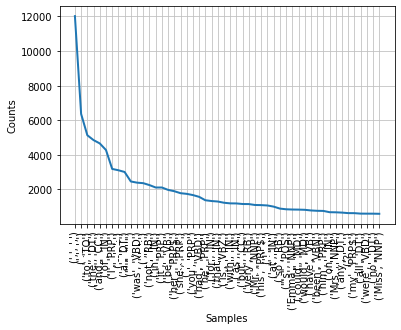

[((',', ','), 12016),
 (('.', '.'), 6355),
 (('to', 'TO'), 5125),
 (('the', 'DT'), 4844),
 (('and', 'CC'), 4653),
 (('of', 'IN'), 4272),
 (('I', 'PRP'), 3177),
 (('--', ':'), 3100),
 (('a', 'DT'), 3001),
 (("''", "''"), 2452)]

In [20]:
%matplotlib inline
text_obj.plot(50)
text_obj.vocab().most_common(10)

## **2 한글을 활용한 NLTK 메서드 실습**
1. NLTK 는 영문이 기준인 만큼, 분석 결과를 확인 후 **Regex 로 보완이** 필요 합니다.
1. Matplotlib 에서도 **한글과, 음수표시** 등 추가적 설정이 필요 합니다.

```python
from matplotlib import rc, rcParams
rc('font', family=['NanumGothic','Malgun Gothic']) # 한글의 표시
rcParams['axes.unicode_minus'] = False             # '-' 표시의 처리
```

In [21]:
text_kor = Text(corpus.split())
text_kor.vocab().N(), text_kor.vocab().B()

(248, 213)

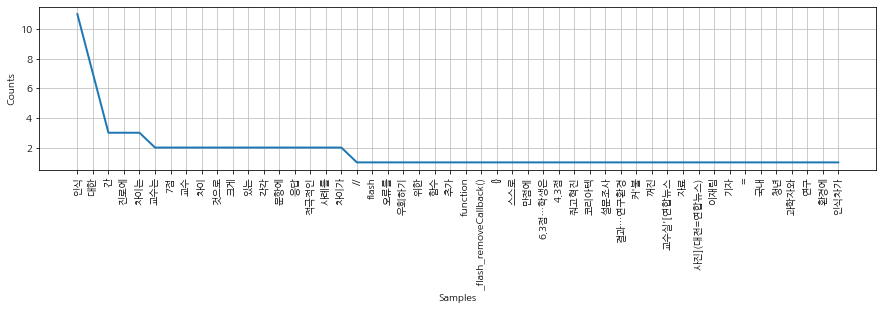

[('인식', 11),
 ('대한', 7),
 ('간', 3),
 ('진로에', 3),
 ('차이는', 3),
 ('교수는', 2),
 ('7점', 2),
 ('교수', 2),
 ('차이', 2),
 ('것으로', 2)]

In [22]:
from matplotlib import rc, rcParams
rc('font', family=['NanumGothic','Malgun Gothic']) # 한글의 표시
rcParams['axes.unicode_minus'] = False             # '-' 표시의 처리

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 3))  # 파레트 설정

text_kor.plot(50)
text_kor.vocab().most_common(10)

# **Statistic NLP의 기초 (통계기법의 활용)**
## **1 Zipf Law 를 활용한 Topic 분석**
https://statkclee.github.io/text/nlp-zipf-law.html
- 출현빈도가 높아도 중요하지 않은 단어들이 섞여있는 만큼
- 이를 줄이는 방식으로 **Stop Words** 를 활용하는 방식과
- 이와 함께 **중간 빈도의 단어들을 중심으로** 주제를 추출 합니다.

<img src="./data/zipf_law.png" width="250" align="left">

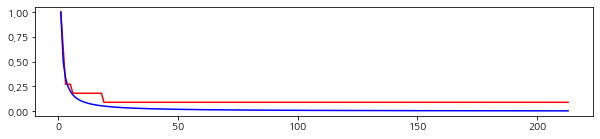

In [23]:
# 내림차순 정렬 (Token 빈도를 key 로 설정하여 정렬)
sorted_kor = sorted(text_kor.vocab().items(), key=lambda x:x[1], reverse=True)

# 전체 빈도값을 최대빈도로 나눠서 0~1 사이의 값으로 정규화
max_kor   = max(text_kor.vocab().values())  # 최대 빈도값 추출
freq_rate = [ _[1]/max_kor  for _ in sorted_kor]

x = [_+1 for _ in range(len(freq_rate))]
plt.figure(figsize = (10, 2))  # 파레트 설정
plt.plot(x, freq_rate, 'r-')   # 정규화 된 빈도수  
plt.plot(x, [1/(_+1)  for _ in range(len(freq_rate))], "b-") # Zif's Law 그래프

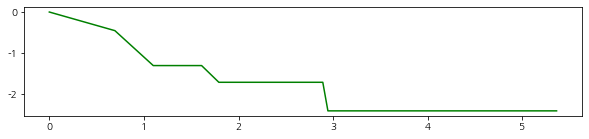

In [24]:
# Log() 씌운 결과 직선 비스므리 내려가는 모습을 보여주고 있다
from math import log
_x = [log(_)  for _ in x]
_y = [log(_)  for _ in freq_rate]
plt.figure(figsize = (10, 2))  # 파레트 설정
plt.plot(_x, _y, "g-")

## **2 Token 의 빈도값 측정**
```python
text_kor.vocab().most_common() # 빈도기준 정렬결과를 출력
text_kor.vocab().freq("날씨")   # Token 의 출현 빈도값 계산
```

In [25]:
# 네이버 뉴스 데이터 크롤링
corpus = ""
for _ in fileList:
    with open("./News/"+_) as f:
        corpus += f.read()

# 단어들의 출현빈도내용 살펴보기
freq = [ text_kor.vocab().freq(_[0]) for _ in text_kor.vocab().most_common()]
max(freq), min(freq)

(0.04435483870967742, 0.004032258064516129)

In [26]:
# 상위 빈도 10% Token 의 출력
threshold = 0.10
removed   = []

for _ in text_kor.vocab().most_common():
    print(text_kor.vocab().freq(_[0]))
    threshold -= text_kor.vocab().freq(_[0])
    removed.append(_)
    if threshold < 0:
        break

removed

0.04435483870967742
0.028225806451612902
0.012096774193548387
0.012096774193548387
0.012096774193548387


[('인식', 11), ('대한', 7), ('간', 3), ('진로에', 3), ('차이는', 3)]

# **Word Piece Model**
- https://wikidocs.net/22592 (단어 분리(Subword Segmentation))
- **BPE(Byte Pair Encoding)** 알고리즘 (1994) Philip Gage 논문이 배경
- **WPM** 모델링 기법 : 2016 년 **Pre Processing 모델링을** 활용한 Stemming 기법

## **1 defaultDict 을 활용한 단어조합기**
**defaultDict()** 을 활용한 **N-Gram** 생성 후 **단어 조합하기** 연습
- https://itholic.github.io/python-defaultdict/
- dict 객체는 **없는 key 호출시 오류를** 출력하지만
- **defaultdict** 에서 **없는 key 호출시, key를 생성하고 value 를 0 으로 자동 초기화** 합니다.
- 호출의 효율성을 높이기 위한 모듈로써 활용 됩니다

In [27]:
# 단어 Token 을 음절단위로 구분하기
" ".join(list("low")+["</w>"]) 

'l o w </w>'

In [28]:
# Token 과 빈도수를 활용한 
data = {
    " l o w </w>":5,
    " l o w e s t </w>":2,
    " n e w e r </w>":6,
    " w i d e r </w>":3,
}

from collections import defaultdict
pair      = defaultdict(int)
candidate = {}
n_gram    = 2

for k, v in data.items():
    token = k.split()
    for i in range(len(token)-1):
        pair[tuple(token[ i : i+n_gram ])] += v
pair

defaultdict(int,
            {('l', 'o'): 7,
             ('o', 'w'): 7,
             ('w', '</w>'): 5,
             ('w', 'e'): 8,
             ('e', 's'): 2,
             ('s', 't'): 2,
             ('t', '</w>'): 2,
             ('n', 'e'): 6,
             ('e', 'w'): 6,
             ('e', 'r'): 9,
             ('r', '</w>'): 9,
             ('w', 'i'): 3,
             ('i', 'd'): 3,
             ('d', 'e'): 3})

In [29]:
# .get : Tuple 의 객체들을 따로 따로 묶어서 판단 합니다.
maxKey = max(pair, key=pair.get) # pair.get : <function defaultdict.get>
maxKey

('e', 'r')

In [30]:
# 함께 출현하는 빈도가 높을수록 단어로 묶일 확률이 높다
# 작업결과 "er" 이 묶인걸 볼 수 있습니다.
newData = {}
for k, v in data.items():
    newKey = re.sub(" ".join(maxKey), "".join(maxKey), k)
    newData[newKey] = v
newData

{' l o w </w>': 5,
 ' l o w e s t </w>': 2,
 ' n e w er </w>': 6,
 ' w i d er </w>': 3}

## **2 Word Piece Model 한글실습**
- defaultDict 단어 token 을 만든 뒤,
- Bi-Gram 빈도를 기준으로 단어 Token 을 찾기

In [31]:
# Ngram defaultDict 만들기
def findNgram(data):
    pair = defaultdict(int)
    candidate = {}
    for k, v in data.items():
        token = k.split()
        for i in range(len(token)-1):
            pair[tuple(token[ i : i+2 ])] += v
    return pair

# MaxKey 빈도값을 활용하여 단어 생성하기
def mergeNgram(maxKey, data):
    newData = {}
    for k, v in data.items():
        newKey = re.sub(" ".join(maxKey), "".join(maxKey), k)
        newData[newKey] = v
    return newData

In [32]:
# 어절 Token 목록을 활용한 단어 찾기
data = {
    " 아 버 지 께 </w>":5,
    " 아 버 지 를 </w>":2,
    " 아 버 지 에 게 </w>":6,
    " 아 버 지 와 </w>":3,
}

for _ in range(2):
    pairList = findNgram(data)
    maxKey = max(pairList, key=pairList.get)
    data = mergeNgram(maxKey, data)
data

{' 아버지 께 </w>': 5, ' 아버지 를 </w>': 2, ' 아버지 에 게 </w>': 6, ' 아버지 와 </w>': 3}

## **3 Word Piece Model 한글실습 2**
- 반복 횟수인 MaxKey 값을 자동으로 찾기

In [33]:
data = {
    "아 버 지 께 </w>":5,
    "아 버 지 를 </w>":2,
    "아 버 지 에 게 </w>":6,
    "아 버 지 와 </w>":3,
}
data.values()

dict_values([5, 2, 6, 3])

In [34]:
from collections import defaultdict
def findNagram(data):
    pair = defaultdict(int)
    for k, v in data.items():
        tokens = k.split()
        for i in range(len(tokens)-1):
            pair[tuple(tokens[i:i+2])] += v
    return pair

# maxValue 변수를 추가해 반복 횟수를 제한 합니다
def mergeNgram(maxKey, data):
    newData = dict()
    for k, v in data.items():
        newKey = re.sub(" ".join(maxKey),
                        "".join(maxKey), k)
        newData[newKey] = v
    return newData

maxValue = max(data.values())
maxValue

6

In [35]:
for _ in range(1000):
    pairList = findNagram(data)
    maxKey   = max(pairList, key=pairList.get)
    print(maxKey, pairList[maxKey])
    
    if pairList[maxKey] > maxValue:
        data = mergeNgram(maxKey, data)
    else: 
        break
data

('아', '버') 16
('아버', '지') 16
('아버지', '에') 6


{'아버지 께 </w>': 5, '아버지 를 </w>': 2, '아버지 에 게 </w>': 6, '아버지 와 </w>': 3}

In [36]:
pairList

defaultdict(int,
            {('아버지', '께'): 5,
             ('께', '</w>'): 5,
             ('아버지', '를'): 2,
             ('를', '</w>'): 2,
             ('아버지', '에'): 6,
             ('에', '게'): 6,
             ('게', '</w>'): 6,
             ('아버지', '와'): 3,
             ('와', '</w>'): 3})